# Package

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv("https://perso.telecom-paristech.fr/sabourin/mdi720/household_power_consumption.txt",
                 sep = ";",
                 usecols = ['Date', 'Time', 'Global_active_power', 'Sub_metering_1'], 
                 na_values = ['?' , ''])

In [3]:
df.head()

Date      Time  Global_active_power  Sub_metering_1
0  16/12/2006  17:24:00                4.216             0.0
1  16/12/2006  17:25:00                5.360             0.0
2  16/12/2006  17:26:00                5.374             0.0
3  16/12/2006  17:27:00                5.388             0.0
4  16/12/2006  17:28:00                3.666             0.0

In [4]:
print("there are", df.isna().any(axis = 1).sum(), "of rows containing missing values")

there are 25979 of rows containing missing values


# Drop NAN

In [5]:
df = df.copy()
df = df.dropna(axis=0)

In [6]:
df

Date      Time  Global_active_power  Sub_metering_1
0        16/12/2006  17:24:00                4.216             0.0
1        16/12/2006  17:25:00                5.360             0.0
2        16/12/2006  17:26:00                5.374             0.0
3        16/12/2006  17:27:00                5.388             0.0
4        16/12/2006  17:28:00                3.666             0.0
...             ...       ...                  ...             ...
2075254  26/11/2010  20:58:00                0.946             0.0
2075255  26/11/2010  20:59:00                0.944             0.0
2075256  26/11/2010  21:00:00                0.938             0.0
2075257  26/11/2010  21:01:00                0.934             0.0
2075258  26/11/2010  21:02:00                0.932             0.0

[2049280 rows x 4 columns]

# Modify Sub_metering_1

In [7]:
df["Sub_metering_1"].describe()

count    2.049280e+06
mean     1.121923e+00
std      6.153031e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.800000e+01
Name: Sub_metering_1, dtype: float64

In [8]:
df["Sub_metering_1"] = df["Sub_metering_1"] * 0.06
df["Sub_metering_1"].describe()

count    2.049280e+06
mean     6.731540e-02
std      3.691819e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.280000e+00
Name: Sub_metering_1, dtype: float64

# Modify index

In [9]:
df.head()

Date      Time  Global_active_power  Sub_metering_1
0  16/12/2006  17:24:00                4.216             0.0
1  16/12/2006  17:25:00                5.360             0.0
2  16/12/2006  17:26:00                5.374             0.0
3  16/12/2006  17:27:00                5.388             0.0
4  16/12/2006  17:28:00                3.666             0.0

In [10]:
date = pd.to_datetime(df["Date"] + ' ' + df['Time'], dayfirst=True)
df.set_index(date, inplace = True)
df.head()

Date      Time  Global_active_power  Sub_metering_1
2006-12-16 17:24:00  16/12/2006  17:24:00                4.216             0.0
2006-12-16 17:25:00  16/12/2006  17:25:00                5.360             0.0
2006-12-16 17:26:00  16/12/2006  17:26:00                5.374             0.0
2006-12-16 17:27:00  16/12/2006  17:27:00                5.388             0.0
2006-12-16 17:28:00  16/12/2006  17:28:00                3.666             0.0

In [11]:
#'date' and 'time' are now remove
del df['Date']
del df['Time']
print(df.head())

                     Global_active_power  Sub_metering_1
2006-12-16 17:24:00                4.216             0.0
2006-12-16 17:25:00                5.360             0.0
2006-12-16 17:26:00                5.374             0.0
2006-12-16 17:27:00                5.388             0.0
2006-12-16 17:28:00                3.666             0.0


# Plot time series

In [15]:
day_target = '02/01/2007'

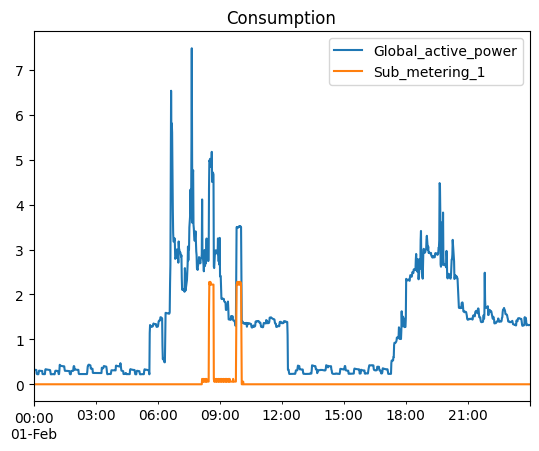

In [19]:
# We can plot all variables like
df[day_target:day_target].plot()
plt.title("Consumption")
plt.legend()
plt.show()

In [81]:
# Group by Day '01/01/2007' to '04/30/2007'
ts_1 = df.resample("D").mean()
day_ini = '01/01/2007'
day_end = '04/30/2007'
small_ts_1 = ts_1[day_ini:day_end]
print(small_ts_1)

            Global_active_power  Sub_metering_1
2007-01-01             1.909031        0.000000
2007-01-02             0.881414        0.000000
2007-01-03             0.704204        0.000000
2007-01-04             2.263481        0.043792
2007-01-05             1.884281        0.061792
...                         ...             ...
2007-04-26             0.885740        0.055167
2007-04-27             0.759953        0.073833
2007-04-28             1.082762        0.000000
2007-04-29                  NaN             NaN
2007-04-30             0.730594        0.126458

[120 rows x 2 columns]


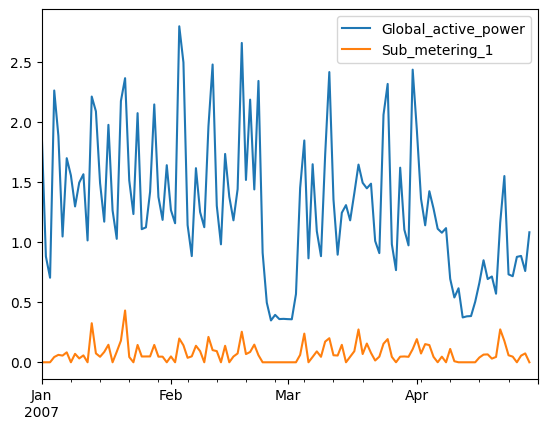

In [82]:
small_ts_1.plot()
plt.show()

In [ ]:
df["day"] = df.index.day
Global_active_power_daily_avg = df.groupby('day')["Global_active_power"].mean()
print(Global_active_power_daily_avg)

In [ ]:
plt.figure()
plt.plot(df["Global_active_power"].mean())
plt.show()

# Add variable related to Temperature

In [88]:
filename = 'https://perso.telecom-paristech.fr/sabourin/mdi720/TG_STAID011249.txt'

df_add = pd.read_csv(
    filename,
    sep=",",
    skiprows=20,           
    usecols=["DATE", "TG"],
    skipinitialspace=True  # Drop spaces les espaces après les virgules
)

In [89]:
df_add["TG"] = df_add["TG"] / 10

In [90]:
df_add["TG"].isnull().sum()

np.int64(0)

In [91]:
df_add

DATE    TG
0      19210301   5.0
1      19210302   4.6
2      19210303   4.6
3      19210304   3.1
4      19210305   9.5
...         ...   ...
34878  20160827  26.6
34879  20160828  25.5
34880  20160829  20.6
34881  20160830  20.4
34882  20160831  21.0

[34883 rows x 2 columns]

In [92]:
df_add["DATE"] = pd.to_datetime(df_add["DATE"], format = '%Y%m%d', dayfirst=True)

In [93]:
df_add

DATE    TG
0     1921-03-01   5.0
1     1921-03-02   4.6
2     1921-03-03   4.6
3     1921-03-04   3.1
4     1921-03-05   9.5
...          ...   ...
34878 2016-08-27  26.6
34879 2016-08-28  25.5
34880 2016-08-29  20.6
34881 2016-08-30  20.4
34882 2016-08-31  21.0

[34883 rows x 2 columns]

In [94]:
df_add.set_index(df_add["DATE"], inplace = True)

In [102]:
ts_2 = df_add.resample("D")
small_ts_2 = df_add["TG"][day_ini : day_end]
print(len(small_ts_1), len(small_ts_2))

120 120


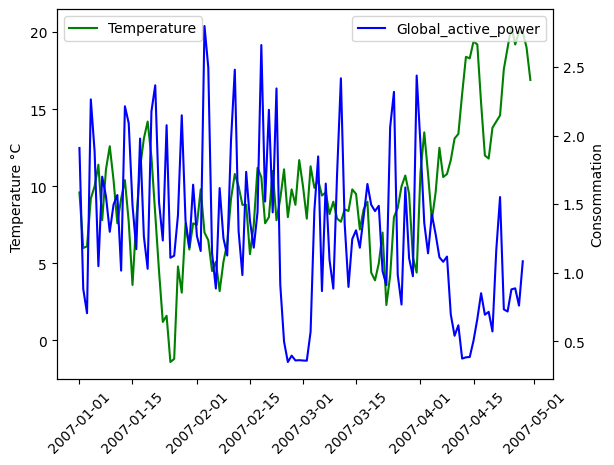

In [124]:
fig , ax1 = plt.subplots()
ax1.plot(small_ts_2, color = "green", label = "Temperature")
ax1.set_ylabel("Temperature °C ")
plt.legend()
plt.xticks(rotation=45)
         
ax2 = ax1.twinx()
ax2.plot(small_ts_1["Global_active_power"], color = "blue", label = "Global_active_power")
ax2.set_ylabel("Consommation")
plt.legend()

plt.show()